In [71]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

data = pd.read_csv('Covid-19_SG.csv')
data.index = data['Date'].apply(lambda s: datetime.strptime(s, '%Y-%m-%d'))

#data['Date'] = pd.to_datetime(data['Date'])
#data.set_index('Date', inplace=True)
#data = data.apply(pd.to_numeric, errors='coerce')
#monthly_data = data.resample('M').mean()

Text(0.5, 1.0, 'Missing Value count By Features')

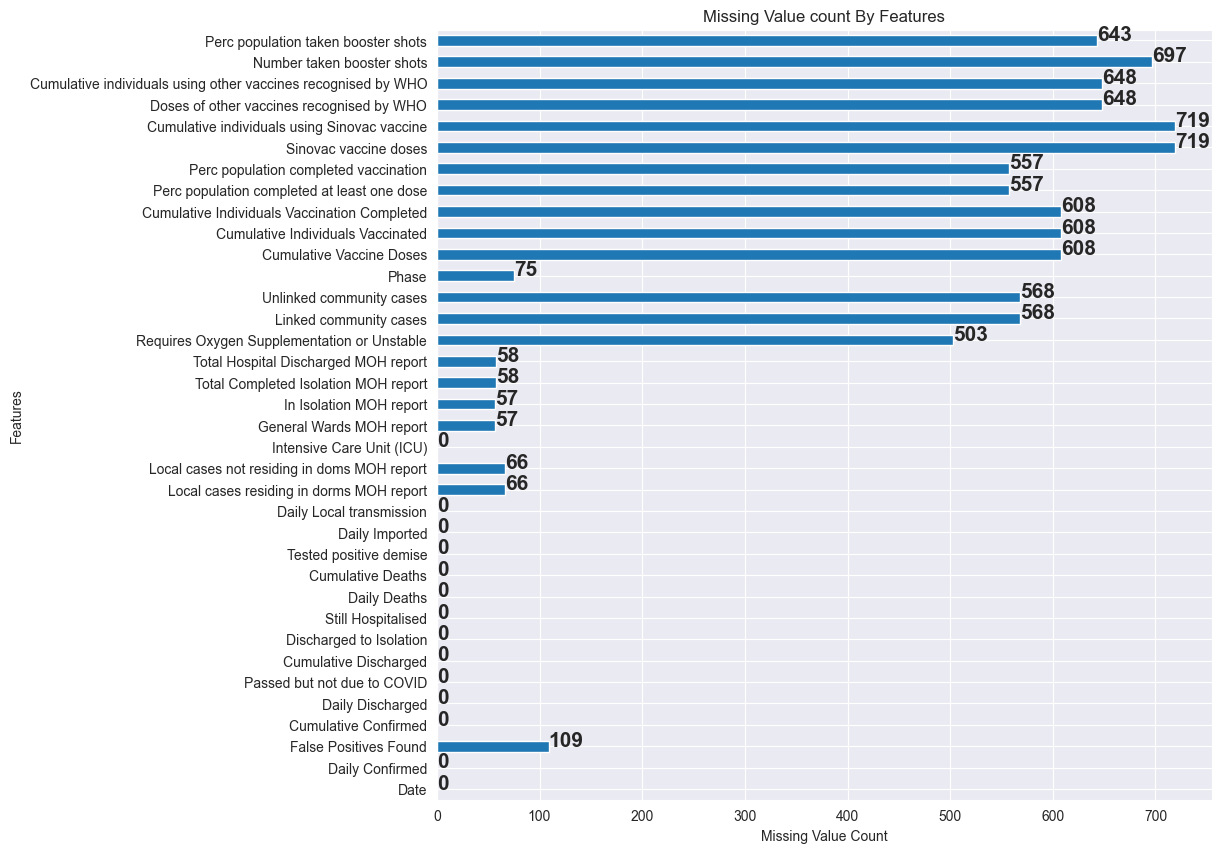

In [72]:
# get number of nan value in each column
data.isna().sum().plot(kind="barh", figsize=(10,10))
for count, value in enumerate(data.isna().sum()):
    plt.text(value, count, str(value), fontweight='bold', fontsize = 15)
plt.xlabel("Missing Value Count")
plt.ylabel("Features")
plt.title("Missing Value count By Features")

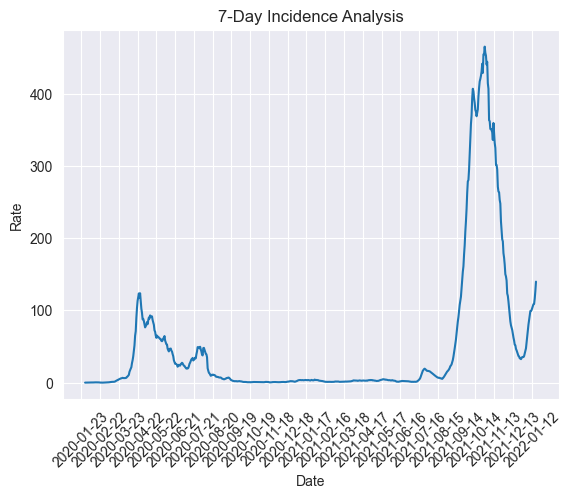

In [73]:
window_size = 7

population = 5686 * 10**3
# Calculate 7-day incidence
data['7-Day Incidence'] = (data['Daily Confirmed'].rolling(window=window_size).sum() / population) * 100000

# Plot the results
plt.plot(data["Date"], data['7-Day Incidence'], label='7-Day Incidence')
plt.xlabel('Date')
plt.ylabel('Rate')
plt.title('7-Day Incidence Analysis')

start_date = '2020-01-30'
x_ticks = data['Date'][::30]
plt.xticks(x_ticks, rotation=45)
plt.show()

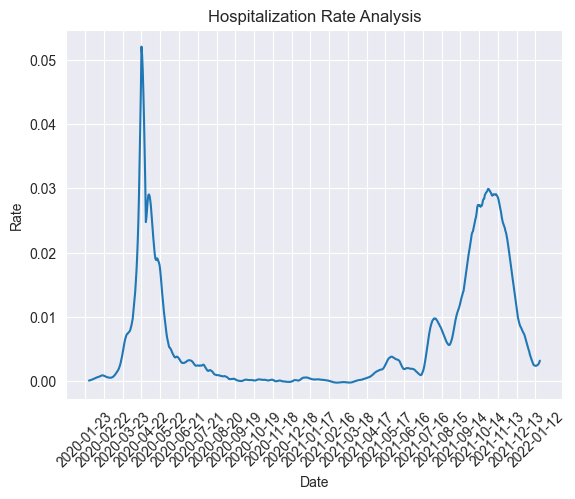

In [74]:
# Calculate hospitalization rate
data['Hospitalization Rate'] =  (data['Still Hospitalised'].rolling(window=window_size).mean() / population) * 100

plt.plot(data.index, data['Hospitalization Rate'], label='Hospitalization Rate')
plt.xlabel('Date')
plt.ylabel('Rate')
plt.title('Hospitalization Rate Analysis')

x_ticks = data['Date'][::30]
plt.xticks(x_ticks, rotation=45)
plt.show()

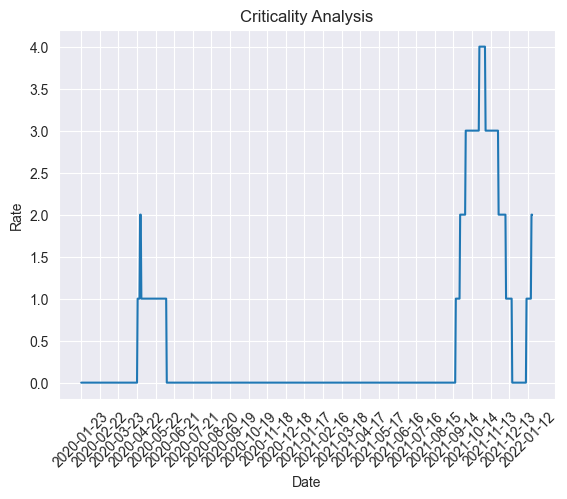

In [75]:
def calCri(incidence):
    if incidence >400:
        return 4
    elif incidence > 200:
        return 3
    elif incidence > 100:
        return 2
    elif incidence > 50:
        return 1
    else:
        return 0

# Calculate criticality rate
data['Criticality Rate'] = data['7-Day Incidence'].rolling(window=window_size).min().apply(calCri)

# Plot the results
plt.plot(data.index, data['Criticality Rate'], label='Criticality Rate')
plt.xlabel('Date')
plt.ylabel('Rate')
plt.title('Criticality Analysis')

x_ticks = data['Date'][::30]
plt.xticks(x_ticks, rotation=45)
plt.show()

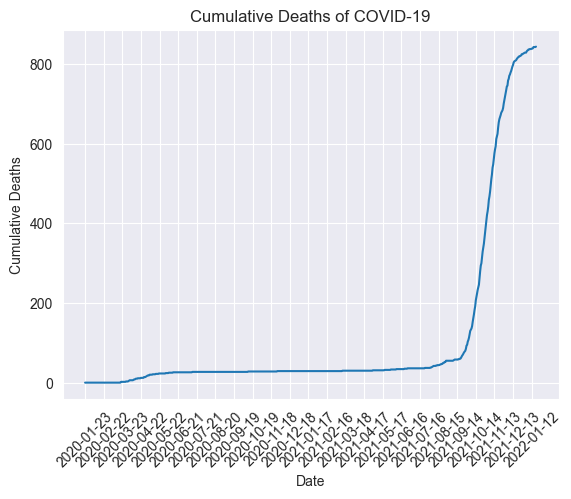

In [76]:
# Implementation and visualization of the cumulative death

plt.plot(data['Date'], data['Cumulative Deaths'])
plt.xlabel('Date')
plt.ylabel('Cumulative Deaths')
plt.title('Cumulative Deaths of COVID-19')

# Set x-axis ticks and labels
x_ticks = data['Date'][::30]
plt.xticks(x_ticks, rotation=45)

plt.show()

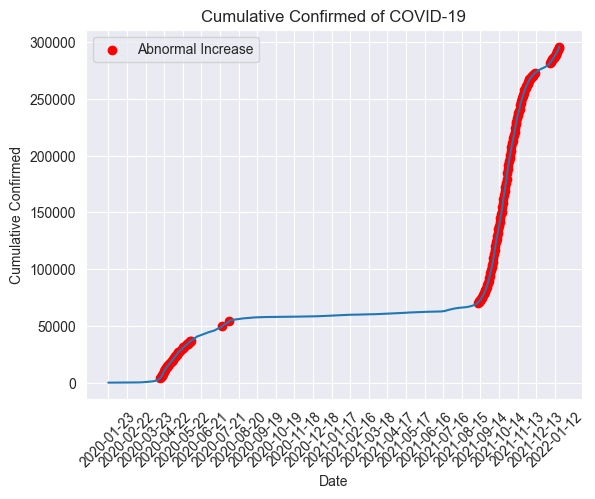

In [77]:
# Recognizing Pandemic Waves

# Set a threshold value for abnormal increase
threshold = 500

# Find the indices where the daily increase exceeds the threshold
abnormal_increase_indices = np.where(data['Daily Confirmed'] > threshold)[0]

# Get the corresponding dates and number of infected people
abnormal_increase_dates = data['Date'].iloc[abnormal_increase_indices]
abnormal_increase_cases = data['Cumulative Confirmed'].iloc[abnormal_increase_indices]

# Plot the cumulative confirmed cases graph
plt.plot(data['Date'], data['Cumulative Confirmed'])
plt.xlabel('Date')
plt.ylabel('Cumulative Confirmed')
plt.title('Cumulative Confirmed of COVID-19')

# Set x-axis ticks and labels
x_ticks = data['Date'][::30]
plt.xticks(x_ticks, rotation=45)

# Mark the points with abnormal increase
plt.scatter(abnormal_increase_dates, abnormal_increase_cases, color='red', label='Abnormal Increase')

plt.legend()
plt.show()